In [1]:
from PIL import Image
import numpy as np
import time
from IPython.display import display
from lib import helper

In [2]:
image1 = Image.open("images/one.jpg")
image2 = Image.open("images/two.jpg")
image3 = Image.open("images/test.png")

### Exercise 1a
##### Description

`downscale` scales images using a kernel of the size of the scaling factor and averages all pixels.  
`downscale_rough` scales images using bilinear interpolation and the resolution decreases, but speed is a bit better.  
Not really worth it, the large performance issues come from bad handling of matrix manipulation.

The algorithm is simple, it just iterates over the 2d array in steps the width of the scaling factor.

### Comparison
`downscale_rough` is barely faster than `downscale` while the quality is much worse. The bottleneck surely isn't the `numpy.sum` but the n^3 complexity without proper optimisation.

Just for comparison, the algorithm used in PIL is way faster.

In [3]:
start = time.time()
im1 = helper.downscale(image1, 0.2)
im2 = helper.downscale(image2, 0.2)
print("Took: " + str(time.time() - start) + " seconds")
Image.fromarray(im1.astype('uint8')).save("images/results/one_compressed.jpeg", "JPEG")
Image.fromarray(im2.astype('uint8')).save("images/results/two_compressed.jpeg", "JPEG")
# display(Image.fromarray(im1.astype('uint8')))
# display(Image.fromarray(im2.astype('uint8')))

Took: 1.093013048171997 seconds


In [4]:
start = time.time()
im1 = helper.downscale_rough(image1, 0.2)
im2 = helper.downscale_rough(image2, 0.2)
print("Took: " + str(time.time() - start) + " seconds")
# display(Image.fromarray(im1.astype('uint8')))
# display(Image.fromarray(im2.astype('uint8')))

Took: 1.0430128574371338 seconds


In [5]:
# Native PIL
start = time.time()
image1.resize((180, 120))
image2.resize((180, 120))
print("Took: " + str(time.time() - start) + " seconds")

Took: 0.014996767044067383 seconds


### Exercise 1b
#### Convolution
###### edge detection
I implemented a simple convolution to apply a bluring filter and edge detection.

The convolution algorithm does not perform very well and is a naive approach, iterating over the 2d array of the image and for every pixel over its three dimensions r, g and b.

The chosen edge detection kernel does not perform very well, even for grayscaled images. I tested with custom images and the problem seems that the given images are hard to process, e.g. background not white and contrast not very high. For images with good contrast the chosen kernel worked very well.

In [6]:
# Edge detection
edge_detection_kernel = np.array([
    [-1,-1,-1],
    [-1,8,-1],
    [-1,-1,-1]
])
res1 = helper.convolve(image1, edge_detection_kernel)
Image.fromarray(res1.astype('uint8')).save("images/results/one_edge_detection.jpeg", "JPEG")
res2 = helper.convolve(image2, edge_detection_kernel)
Image.fromarray(res2.astype('uint8')).save("images/results/two_edge_detection.jpeg", "JPEG")
res3 = helper.convolve(image3, edge_detection_kernel)
Image.fromarray(res3.astype('uint8')).save("images/results/three_edge_detection.jpeg", "JPEG")

##### Smoothing
I used 2 kernels, both gaussian as they are fairly easy to implement and give quite good results.

In [7]:
smooth_kernel = np.array([
    [1,3,1],
    [3,8,3],
    [1,3,1],
]) / 24
b = helper.convolve(image1, smooth_kernel)
Image.fromarray(b.astype('uint8')).save("images/results/one_smooth_light.jpeg", "JPEG")
Image.fromarray(b.astype('uint8')).save("images/results/two_smooth_light.jpeg", "JPEG")

In [8]:
smooth_kernel = np.array([
    [0,1,2,1,0],
    [1,5,8,5,1],
    [2,8,13,8,2],
    [1,5,8,5,1],
    [0,1,2,1,0]
]) / 81
b = helper.convolve(image1, smooth_kernel)
Image.fromarray(b.astype('uint8')).save("images/results/one_smooth_strong.jpeg", "JPEG")
Image.fromarray(b.astype('uint8')).save("images/results/two_smooth_strong.jpeg", "JPEG")

*comparison of original with the two result images:*  
light blurring seems to give a better result and takes shorter time to compute.

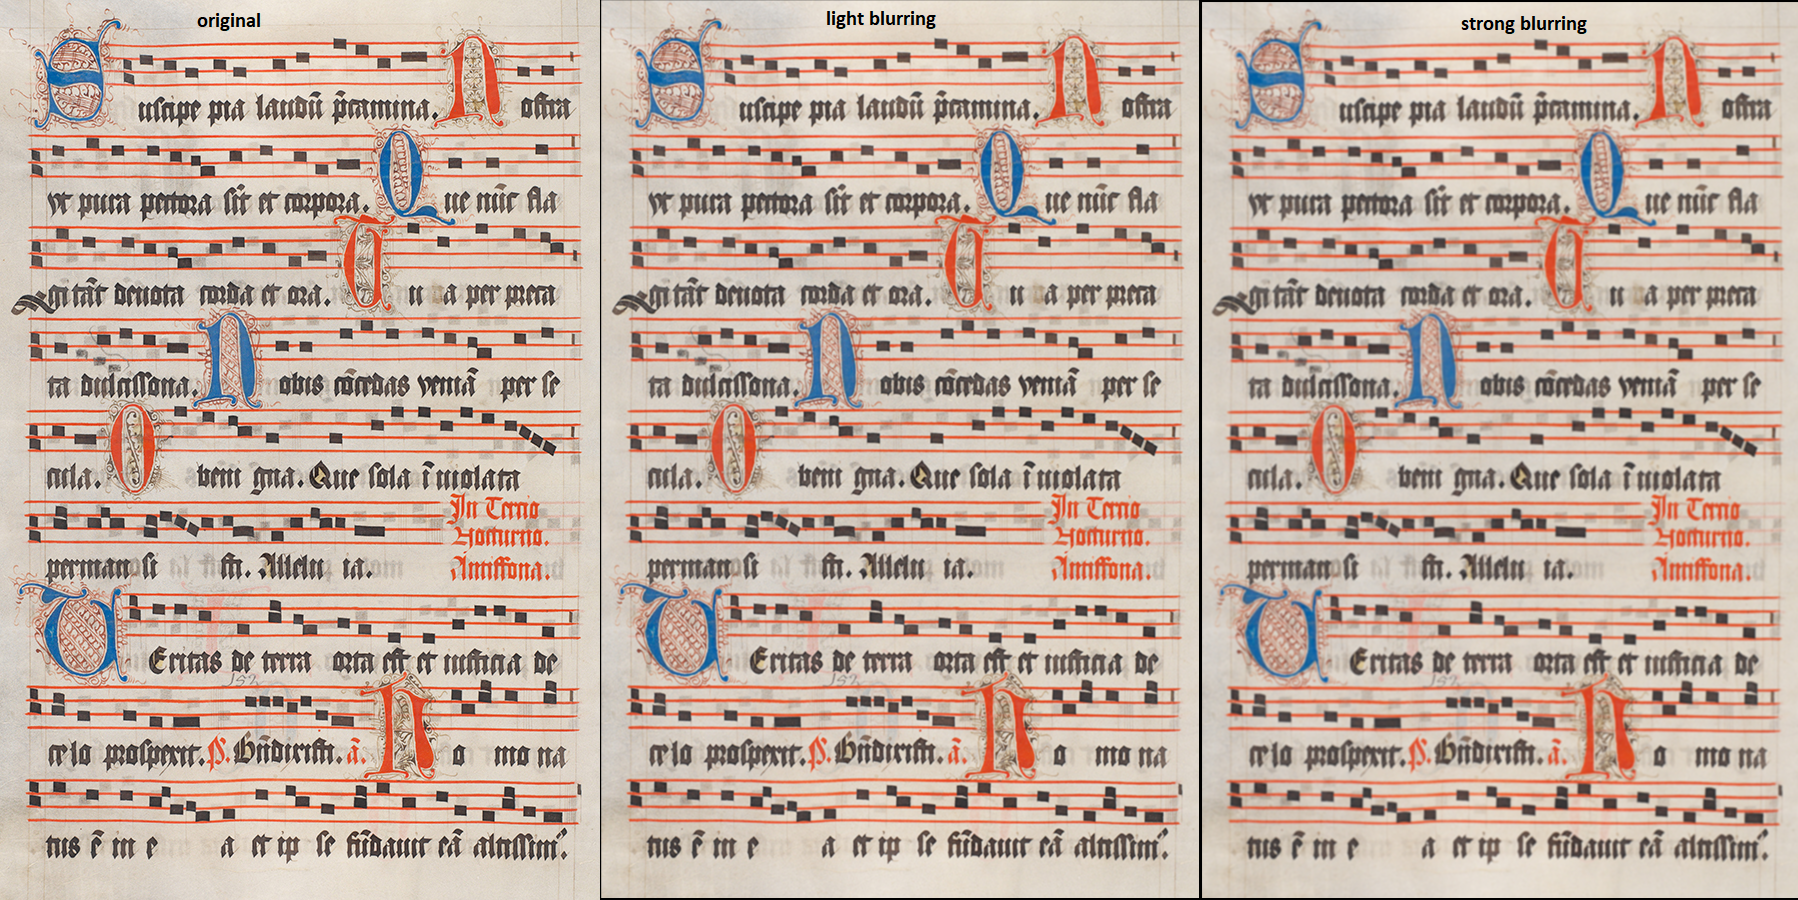

In [9]:
Image.open("images/results/blurring_comparison.png")